In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
data=fetch_california_housing()

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
import pandas as pd
df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
df["Price"]=data.target

In [11]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

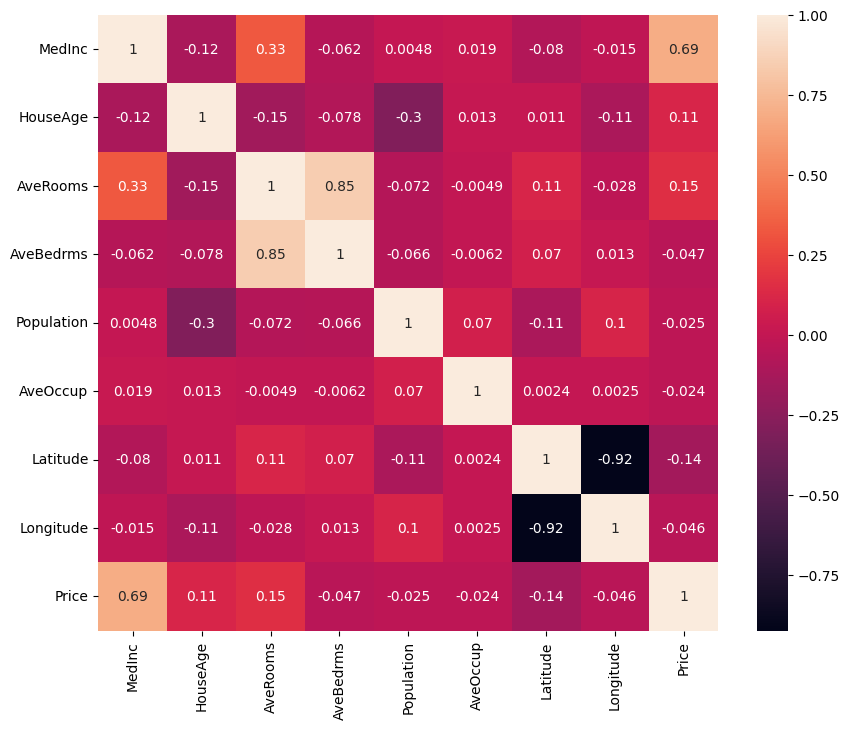

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [50]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [53]:
X_test

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model=LinearRegression()

In [55]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("mean abs error",mean_absolute_error(y_test,y_pred))
print("r2 score :",r2_score(y_test,y_pred))

mean abs error 0.5332001304956564
r2 score : 0.5757877060324508


Text(0, 0.5, 'x predicted data')

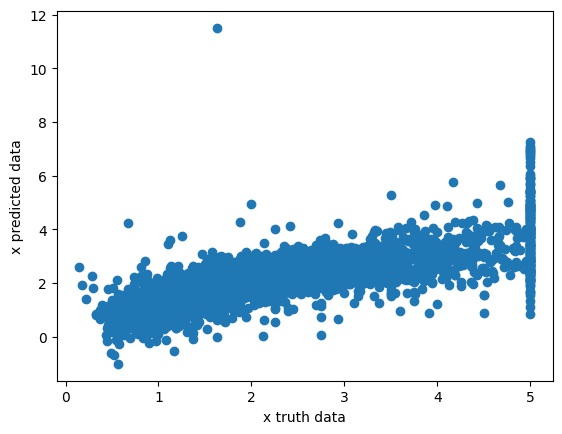

In [57]:
plt.scatter(y_test,y_pred)
plt.xlabel("x truth data")
plt.ylabel("x predicted data")
#should be linear

In [58]:
residuals=y_test-y_pred

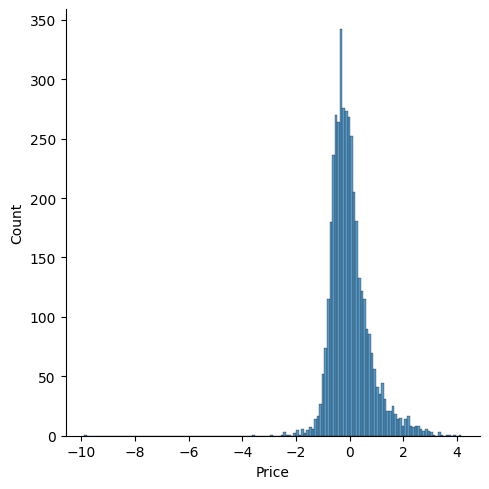

In [60]:
sns.displot(residuals)
#normal distribution

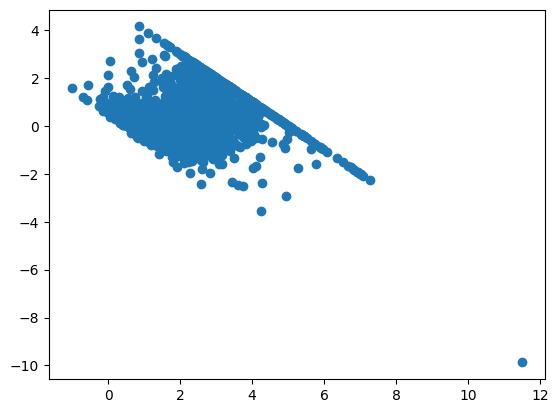

In [62]:
plt.scatter(y_pred,residuals)
#should be uniform
#!not uniformely distributed

In [64]:
import pickle
pickle.dump(model,open("regression.pkl","wb"))

In [ ]:
# model=pickle.load(open("regression.pkl","rb"))